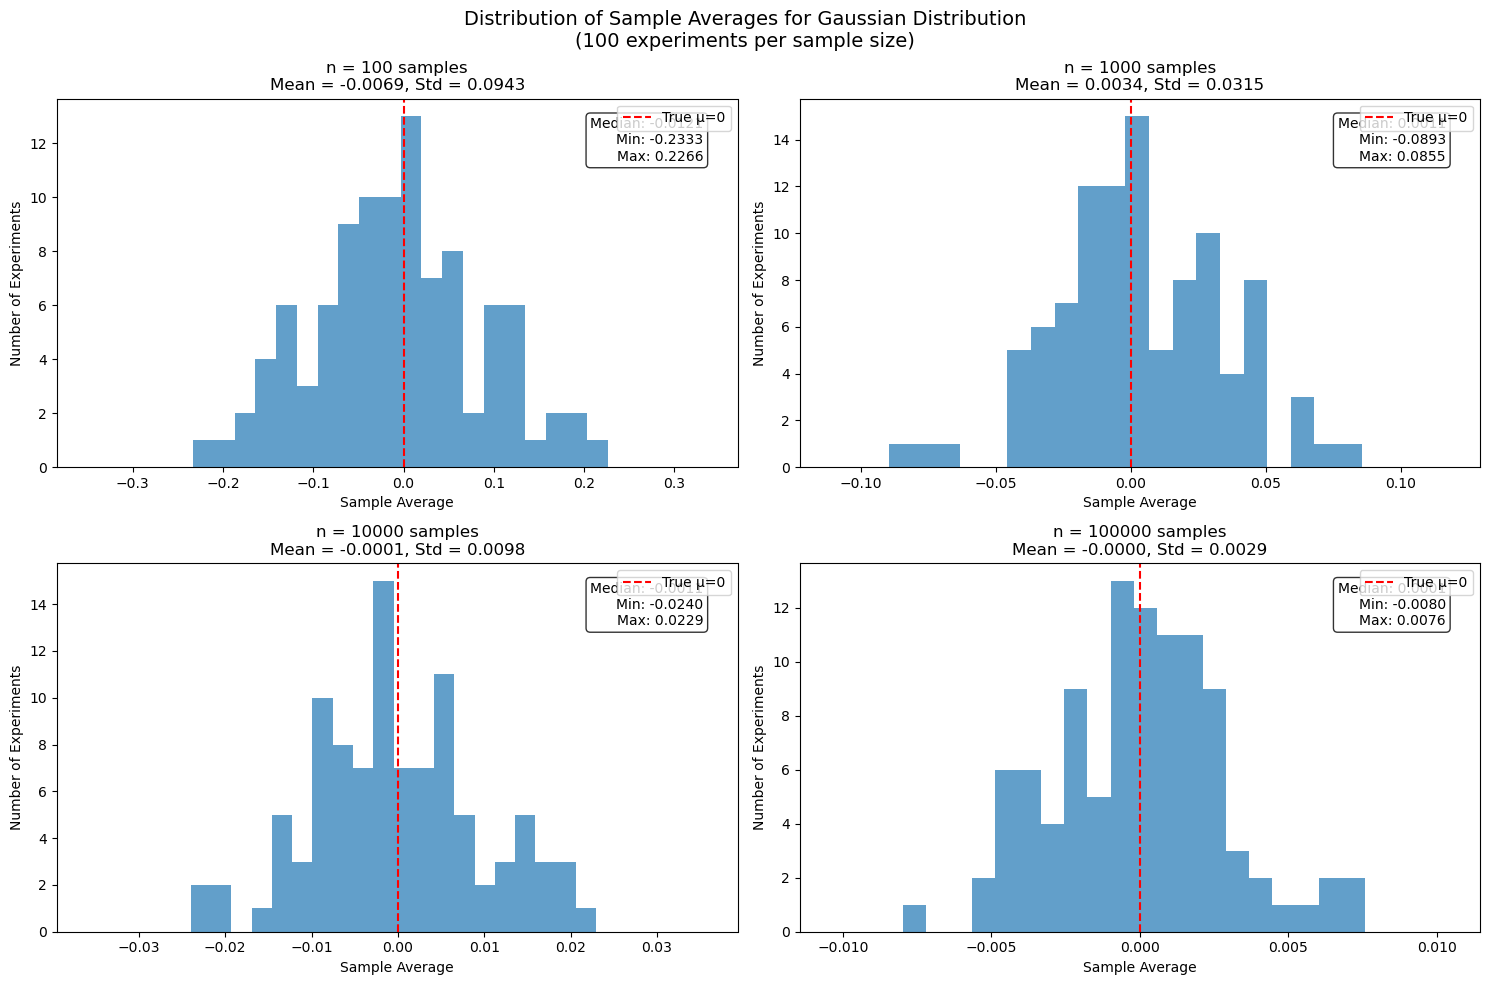


Sample size n = 100:
Mean of averages: -0.0069
Median of averages: -0.0121
Std of averages: 0.0943
Min: -0.2333
Max: 0.2266

Sample size n = 1000:
Mean of averages: 0.0034
Median of averages: 0.0011
Std of averages: 0.0315
Min: -0.0893
Max: 0.0855

Sample size n = 10000:
Mean of averages: -0.0001
Median of averages: -0.0011
Std of averages: 0.0098
Min: -0.0240
Max: 0.0229

Sample size n = 100000:
Mean of averages: -0.0000
Median of averages: 0.0001
Std of averages: 0.0029
Min: -0.0080
Max: 0.0076


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_samples(n, mu=0, sigma=1):
   return np.random.normal(mu, sigma, n)  # Changed to normal distribution

def run_experiment(n_samples, n_experiments=100):
   averages = []
   for _ in range(n_experiments):
       samples = generate_gaussian_samples(n_samples)  # Using Gaussian samples
       averages.append(np.mean(samples))
   return np.array(averages)

# Run experiments
sample_sizes = [100, 1000, 10000, 100000]
results = {n: run_experiment(n) for n in sample_sizes}

# Create histograms
plt.figure(figsize=(15, 10))
for idx, n in enumerate(sample_sizes, 1):
   plt.subplot(2, 2, idx)
   averages = results[n]
   plt.hist(averages, bins=20, density=False, alpha=0.7)
   plt.axvline(x=0, color='r', linestyle='--', label='True μ=0')
   
   # Calculate and display statistics
   mean_val = np.mean(averages)
   std_val = np.std(averages)
   plt.title(f'n = {n} samples\nMean = {mean_val:.4f}, Std = {std_val:.4f}')
   
   plt.xlabel('Sample Average')
   plt.ylabel('Number of Experiments')
   plt.legend()
   
   # Set reasonable axis limits based on the data
   plt.xlim([mean_val - 4*std_val, mean_val + 4*std_val])
   
   # Add text box with more statistics
   stats_text = f'Median: {np.median(averages):.4f}\nMin: {np.min(averages):.4f}\nMax: {np.max(averages):.4f}'
   plt.text(0.95, 0.95, stats_text,
            transform=plt.gca().transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Distribution of Sample Averages for Gaussian Distribution\n(100 experiments per sample size)', fontsize=14)
plt.tight_layout()
plt.savefig('gaussian_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
for n in sample_sizes:
   averages = results[n]
   print(f"\nSample size n = {n}:")
   print(f"Mean of averages: {np.mean(averages):.4f}")
   print(f"Median of averages: {np.median(averages):.4f}")
   print(f"Std of averages: {np.std(averages):.4f}")
   print(f"Min: {np.min(averages):.4f}")
   print(f"Max: {np.max(averages):.4f}")